In [12]:
import numpy as np
import networkx as nx
import scipy as sc
from matplotlib import pyplot as plt
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


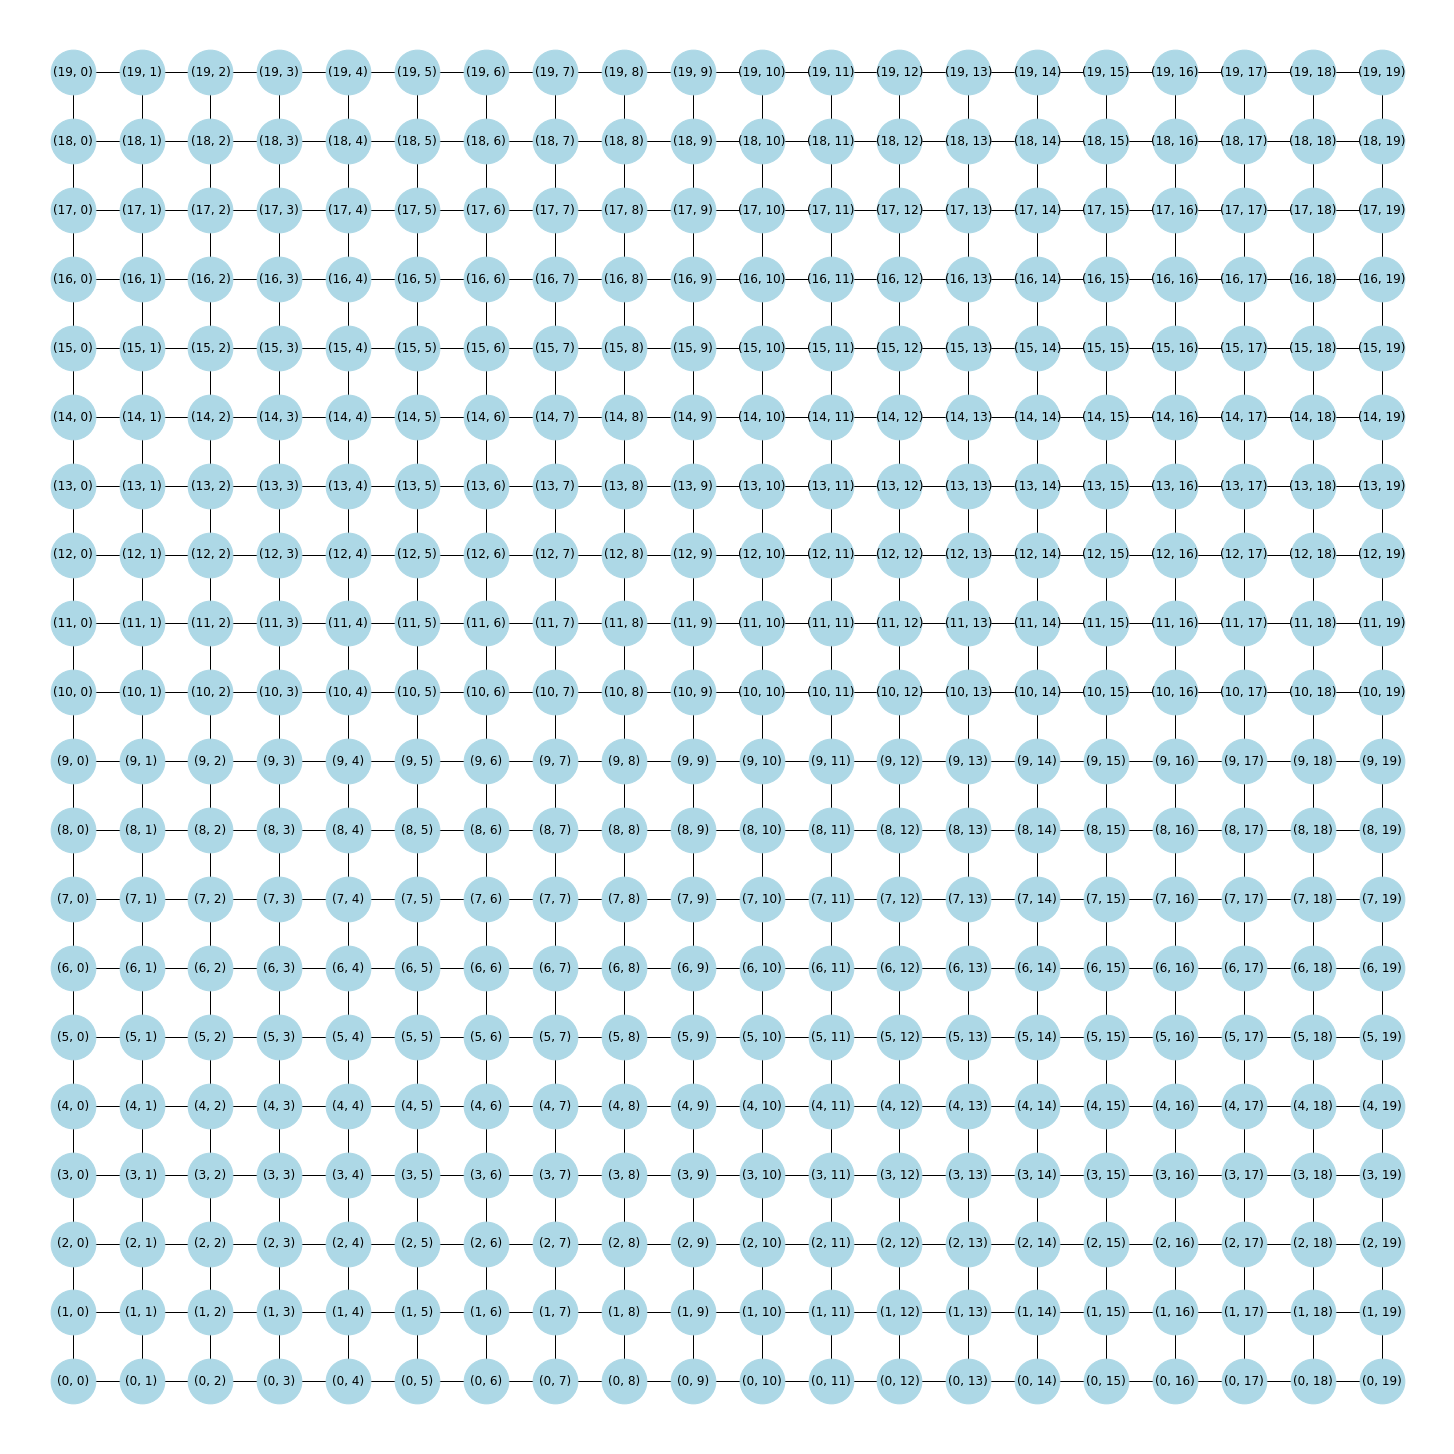

In [46]:
matrix1 = np.arange(400)
matrix1 = matrix1.reshape(20,20)
matrix1 = np.zeros_like(matrix1)
print(matrix1)

grid_graph1 = nx.grid_2d_graph(20,20)
plt.figure(figsize=(20,20))
pos = {(x,y):(y,x) for x,y in grid_graph1.nodes()}
nx.draw(grid_graph1, pos=pos, 
        node_color='lightblue', 
        with_labels=True,
        node_size=2000)


In [94]:
ignore = []
goal = []
start = []

def setField(y, x):
    for i in range(16, 20, 1):
        for j in range(0, 4, 1):
            matrix1[i][j] = 1
    start.append((y, x))

def setObstacle(y, x, direction):
    matrix1[19-y][x] = 3
    for i in range(-1, 2):
        for j in range(-1, 2):
            if (y+i >= 0 and y+i <= 19) and (x+j >= 0 and x+j <= 19):
                ignore.append((y+i, x+j))
    if direction == "North":
        matrix1[19-y-1][x] = 4
        goal.append((y+4, x))
    elif direction == "East":
        matrix1[19-y][x+1] = 4
        goal.append((y, x+4))
    elif direction == "South":
        matrix1[19-y+1][x] = 4
        goal.append((y-4, x))
    else:
        matrix1[19-y][x-1] = 4
        goal.append((y, x-4))

setField(2, 2)
setObstacle(1, 16, "North")
setObstacle(7, 7, "East")
setObstacle(18, 2, "South")
setObstacle(16, 16, "West")

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


<Figure size 1440x1440 with 0 Axes>

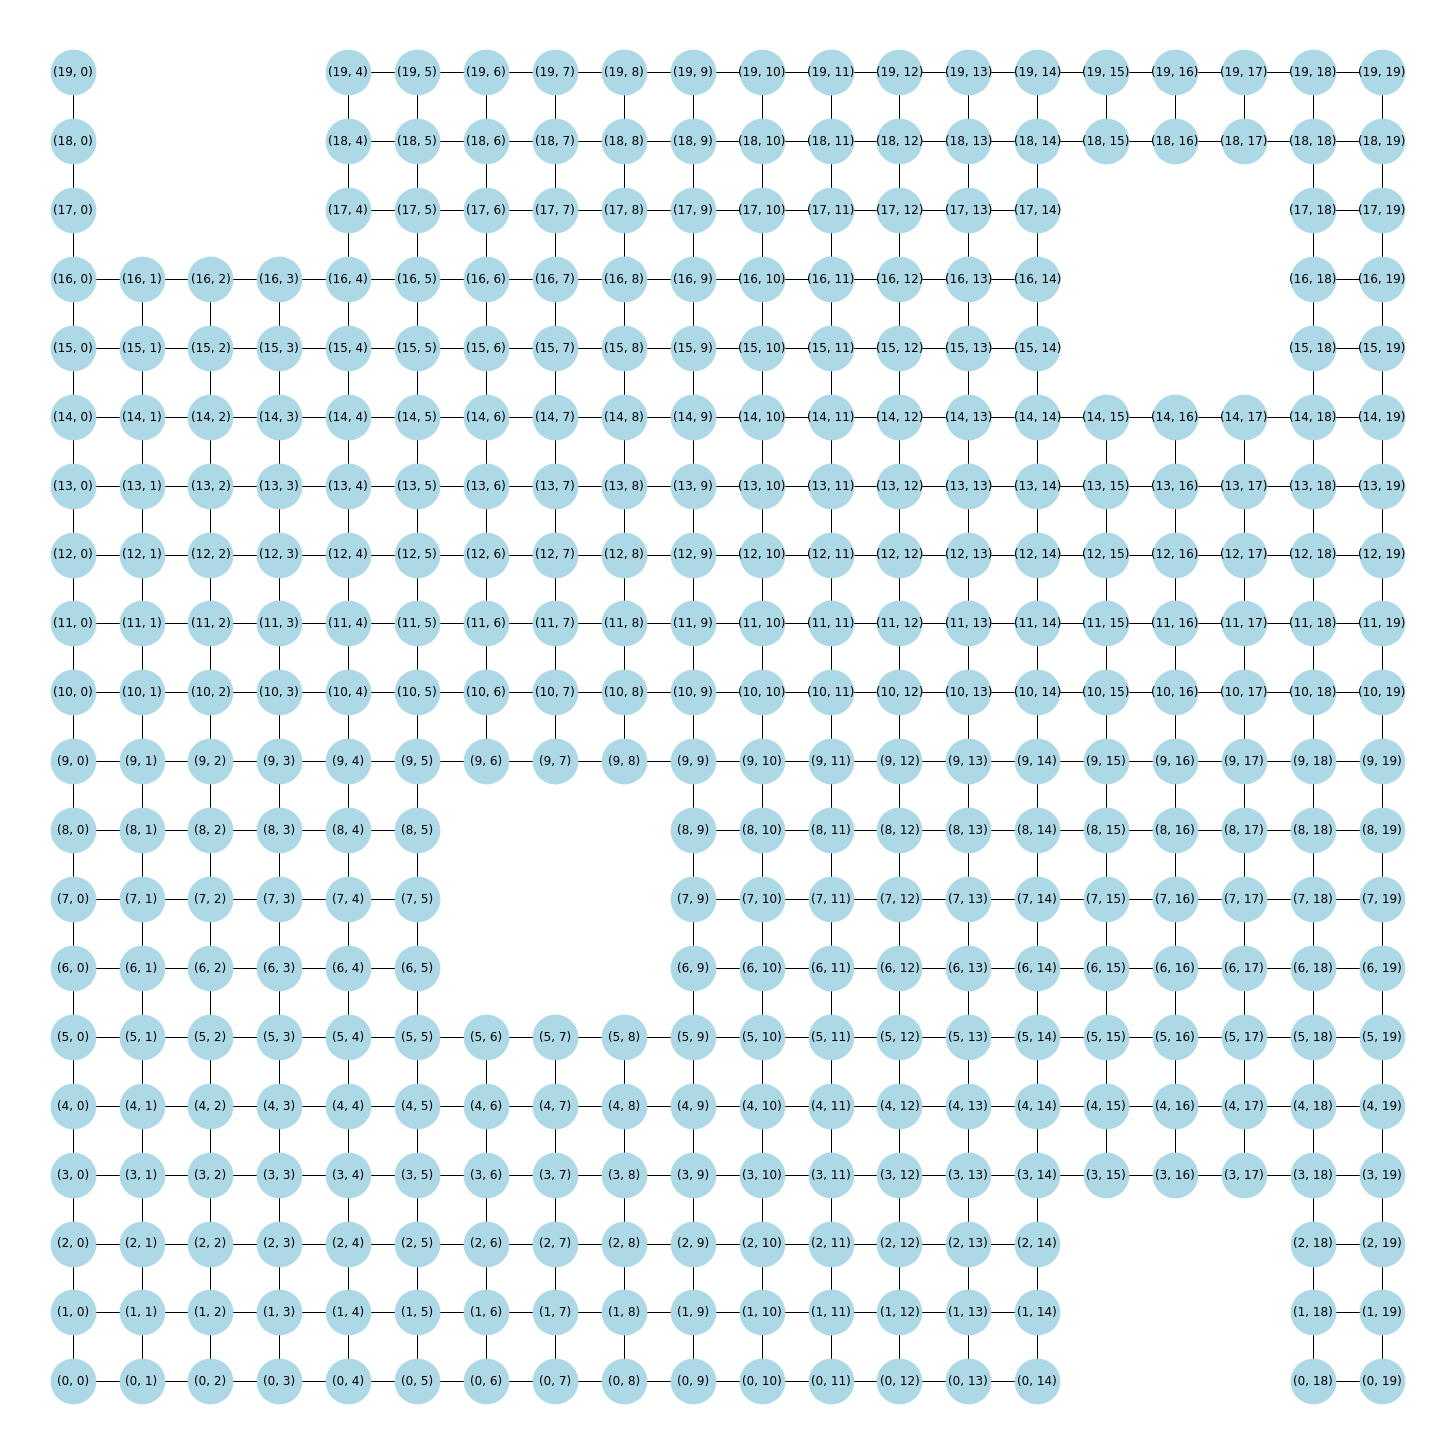

In [95]:
grid_graph2 = nx.grid_2d_graph(20,20)
plt.figure(figsize=(20,20))
#pos = {(x,y):(y,x) for (x,y) in grid_graph1.nodes() if (x,y) not in ignore}
pos = {(x,y):(y,x) for (x,y) in grid_graph2.nodes()}

for i in range(len(ignore)):
    grid_graph2.remove_node(ignore[i])

print(matrix1)
    
plt.figure(figsize=(20,20))
nx.draw(grid_graph2, pos= pos,
    node_color='lightblue', 
    with_labels=True,
    node_size=2000)

In [96]:
tempNo = 400
tempPath = []
index = -1
hPath = []

while len(goal):
    for i in range(len(goal)):
        path = nx.bidirectional_shortest_path(grid_graph2, source=start[0], target=goal[i])
        if len(path) < tempNo:
            tempNo = len(path)
            tempPath = path
            index = i
    print(tempPath)
    hPath.append(tempPath)
    start[0] = goal[index]
    goal.pop(index)
    tempNo = 400

[(2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2)]
[(14, 2), (15, 2), (16, 2), (16, 3), (16, 4), (16, 5), (16, 6), (16, 7), (16, 8), (16, 9), (16, 10), (16, 11), (16, 12)]
[(16, 12), (15, 12), (14, 12), (13, 12), (12, 12), (12, 11), (11, 11), (10, 11), (9, 11), (8, 11), (7, 11)]
[(7, 11), (6, 11), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16)]


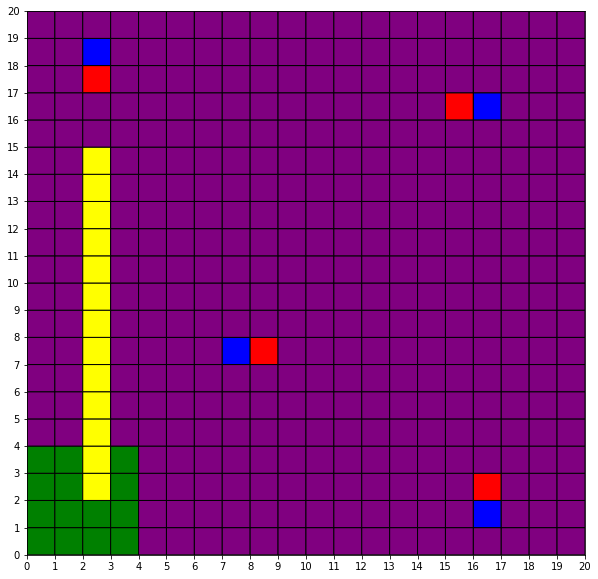

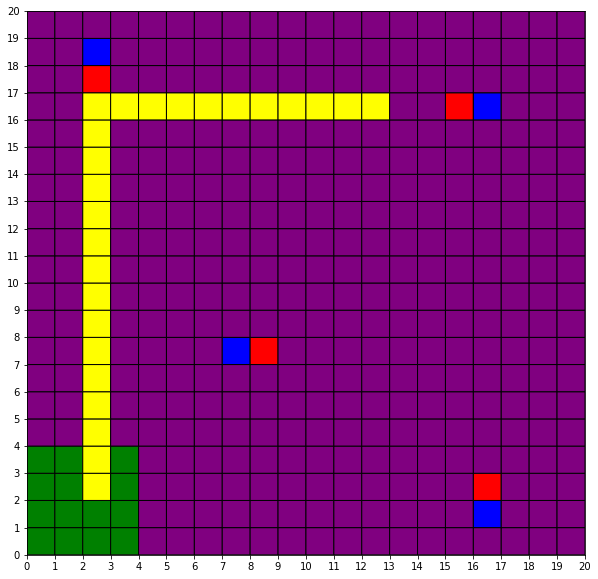

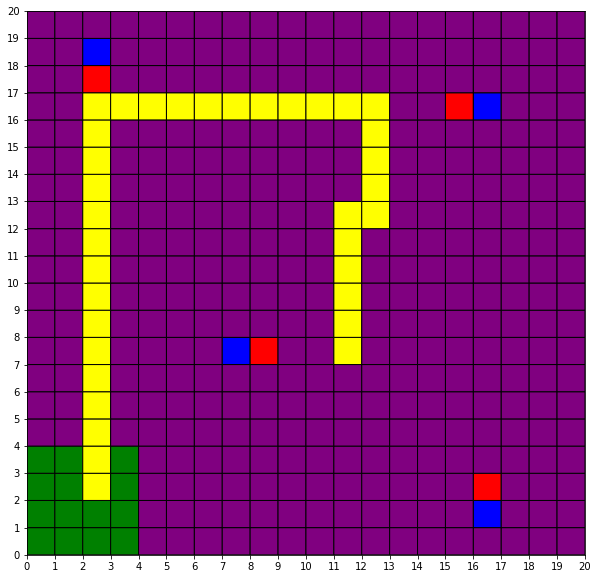

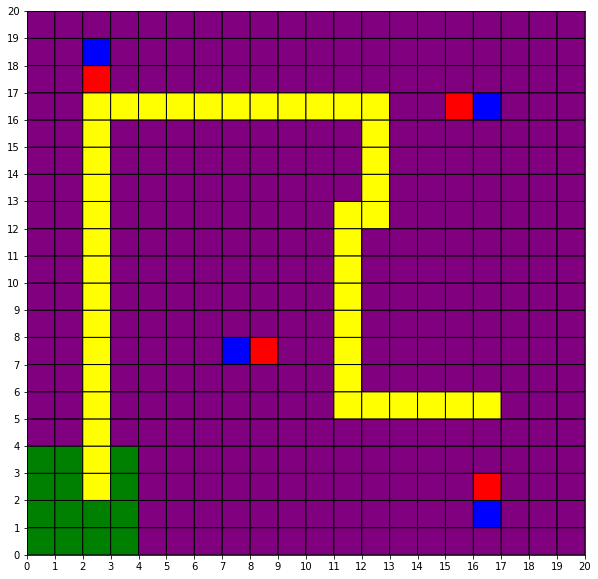

In [100]:
from matplotlib import pyplot as plt
from matplotlib import colors

for path in hPath:
    for coord in path:
        matrix1[19-coord[0]][coord[1]] = 2
    cmap = colors.ListedColormap(["purple","green", "yellow", "blue", "red"])
    plt.figure(figsize=(10,10))
    plt.pcolor(matrix1[::-1],cmap=cmap,edgecolors='k', linewidths=1)
    plt.xticks(np.arange(0,21,step=1))
    plt.yticks(np.arange(0,21,step=1))
    plt.show()